<a href="https://colab.research.google.com/github/ishnt/Data_science_stuff/blob/main/Implementation_of_ANN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import keras

In [7]:
print(tf.__version__)

2.15.0


In [8]:
print(keras.__version__)

2.15.0


In [9]:
mnist=tf.keras.datasets.mnist

In [10]:
print(mnist)

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>


In [13]:
(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

In [14]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
x_train_full.shape

(60000, 28, 28)

In [18]:
y_train_full.shape

(60000,)

In [19]:
x_test.shape

(10000, 28, 28)

In [21]:
y_test.shape

(10000,)

In [26]:
x_valid=x_train_full[:5000]/255

In [27]:
x_train=x_train_full[5000:]/255

In [28]:
y_valid=y_train_full[:5000]

In [29]:
y_train=y_train_full[5000:]

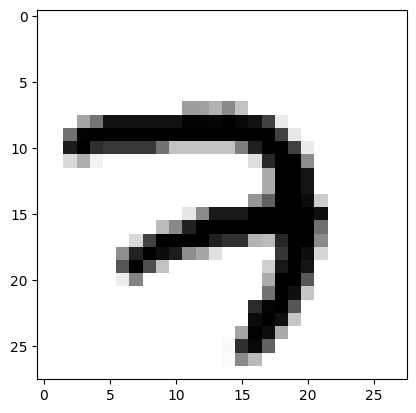

In [31]:
plt.imshow(x_train[0],cmap='binary')

In [32]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [38]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
    tf.keras.layers.Dense(300,activation='relu',name="hiddenLayer1"),
    tf.keras.layers.Dense(100,activation='relu',name="hiddenLayer2"),
    tf.keras.layers.Dense(10,activation='softmax',name="outputLayer")
]

In [39]:
model=tf.keras.models.Sequential(LAYERS)

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRICS=["accuracy"]
model.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [44]:
validation_set=(x_valid,y_valid)

In [47]:
history=model.fit(x_train,y_train,epochs=25,validation_data=validation_set,batch_size=32)

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0079 - accuracy: 0.9994 - val_loss: 0.0699 - val_accuracy: 0.9816
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0075 - accuracy: 0.9995 - val_loss: 0.0681 - val_accuracy: 0.9810
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0072 - accuracy: 0.9996 - val_loss: 0.0702 - val_accuracy: 0.9806
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0069 - accuracy: 0.9996 - val_loss: 0.0694 - val_accuracy: 0.9808
Epoch 5/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0066 - accuracy: 0.9997 - val_loss: 0.0708 - val_accuracy: 0.9818
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0064 - accuracy: 0.9997 - val_loss: 0.0714 - val_accuracy: 0.9816
Epoch 7/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0062 - accuracy: 0.9996 - val_loss: 0.0704 - val_accuracy:

In [49]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.007868,0.999436,0.069912,0.9816
1,0.007548,0.999545,0.068144,0.9810
2,0.007190,0.999564,0.070242,0.9806
3,0.006918,0.999564,0.069358,0.9808
4,0.006644,0.999691,0.070791,0.9818
5,0.006404,0.999655,0.071424,0.9816
6,0.006199,0.999636,0.070432,0.9812
7,0.005938,0.999764,0.070095,0.9810
8,0.005736,0.999709,0.070214,0.9816
9,0.005543,0.999764,0.070901,0.9816


<Axes: >

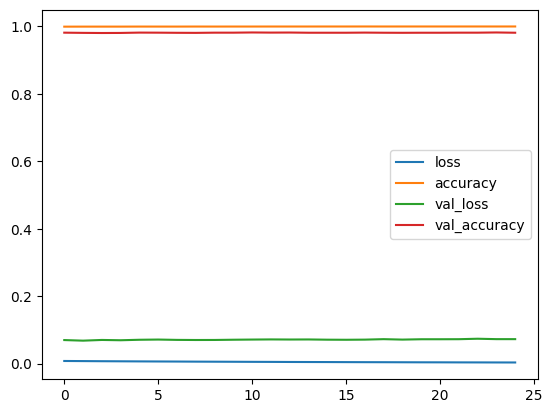

In [50]:
pd.DataFrame(history.history).plot()

In [51]:
#testing
x_new=x_test[:3]


In [65]:
y_pred=model.predict(x_new)

1/1 [==============================] - 0s 34ms/step


In [67]:
np.argmax(y_pred,axis=-1)

array([7, 2, 1])

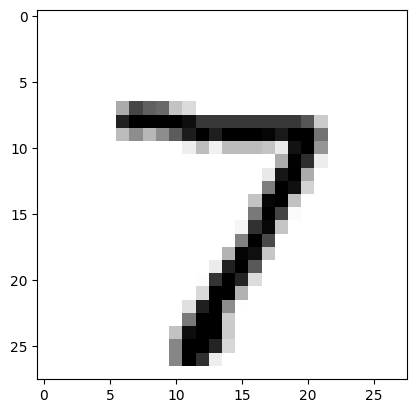

In [59]:
plt.imshow(x_test[0],cmap='binary')



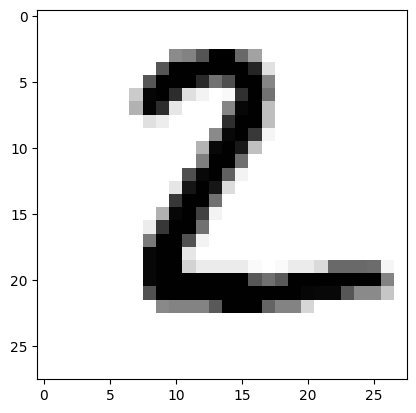

In [60]:
plt.imshow(x_test[1],cmap='binary')

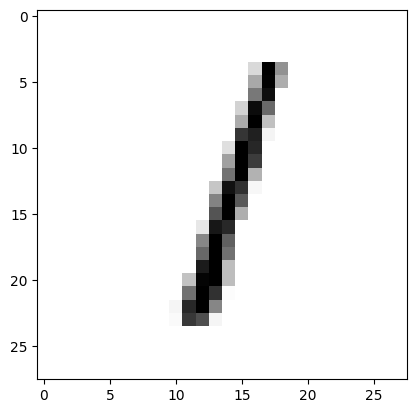

In [61]:
plt.imshow(x_test[2],cmap='binary')

TypeError: Invalid shape (10,) for image data

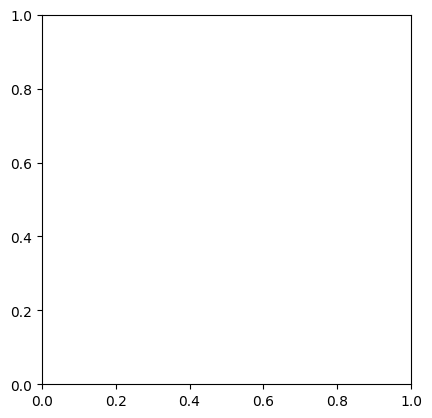